In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [7]:
# Load the dataset
data = pd.read_excel('/content/glass.xlsx')

In [8]:
# 1. Exploratory Data Analysis (EDA)
# Checking the structure and summary of the dataset
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None
               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.

In [9]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


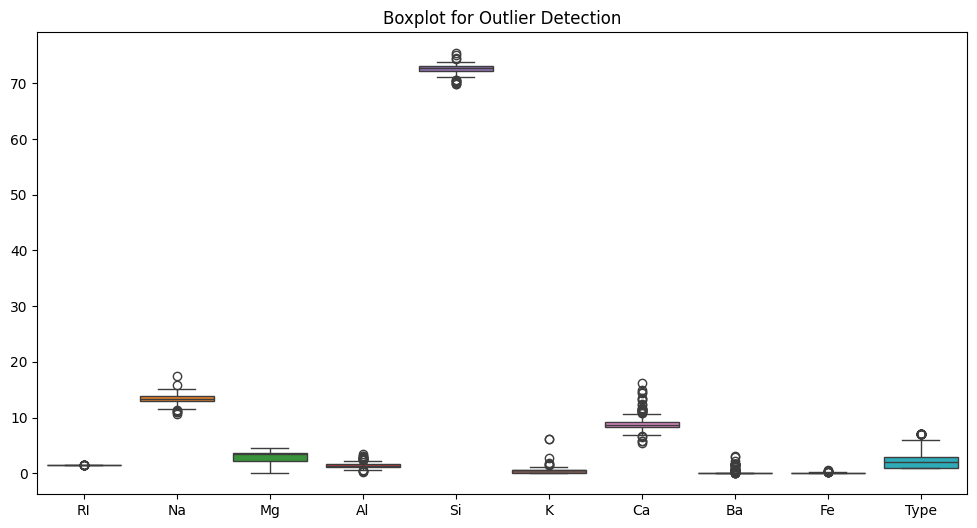

In [10]:
# Check for outliers (visualize with boxplots)
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.title("Boxplot for Outlier Detection")
plt.show()

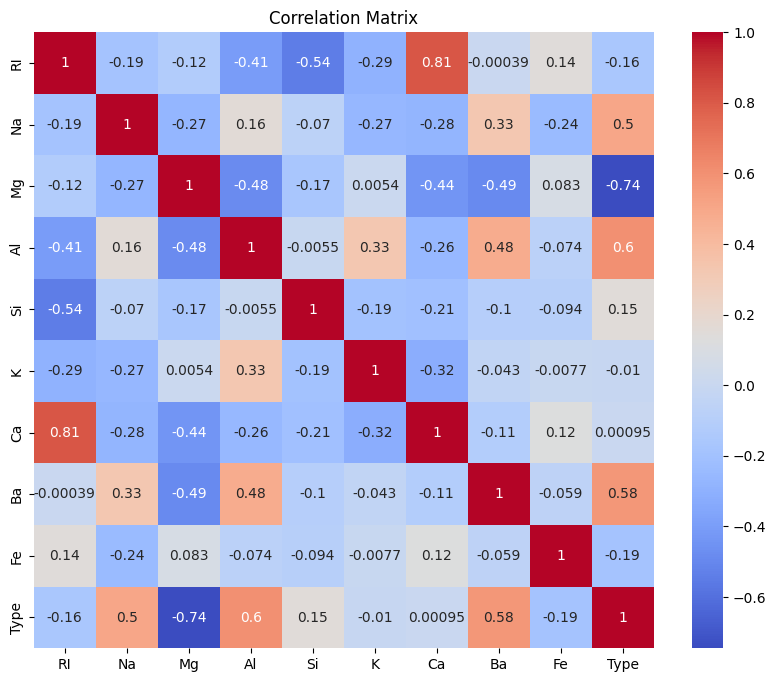

In [11]:
# Check for correlations
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

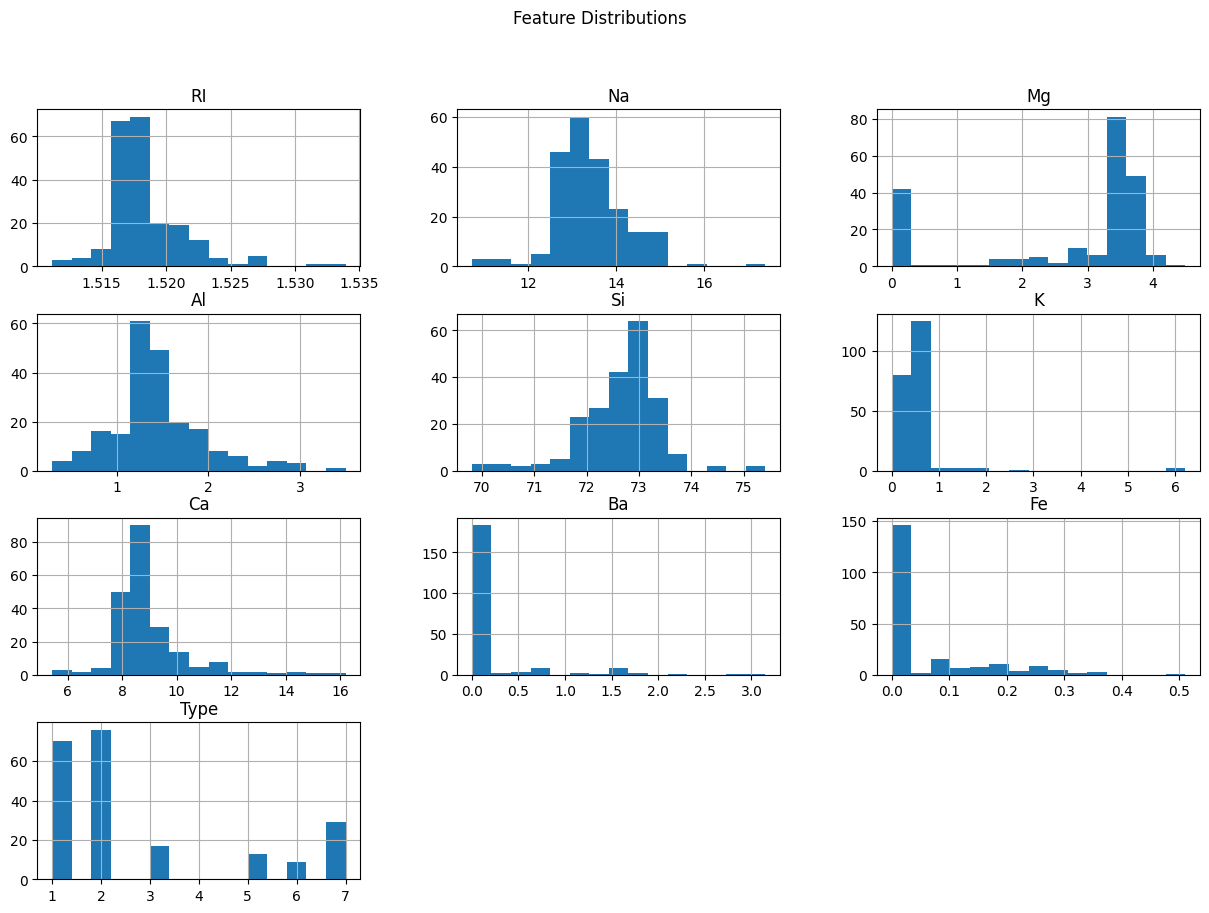

In [12]:
# 2. Data Visualization
# Visualize distributions with histograms
data.hist(bins=15, figsize=(15, 10))
plt.suptitle("Feature Distributions")
plt.show()

In [13]:
# 3. Data Preprocessing
# Handle missing values if any (in this case, none found, so no action needed)
# Encoding categorical variables if there are any (not needed in Glass dataset as it's all numerical)

# Standardize features to bring them on similar scale
features = data.drop(columns=['Type'])  # Assuming 'Type' is the target variable
target = data['Type']
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [15]:
# 4. Random Forest Model Implementation
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
# Predictions and Evaluation
y_pred = rf_model.predict(X_test)
print("Random Forest Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Random Forest Model Performance:
Accuracy: 0.8372093023255814
Precision: 0.866828165374677
Recall: 0.8372093023255814
F1 Score: 0.8330452594474481

Classification Report:
               precision    recall  f1-score   support

           1       0.69      1.00      0.81        11
           2       0.90      0.64      0.75        14
           3       1.00      0.67      0.80         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.84        43
   macro avg       0.91      0.84      0.86        43
weighted avg       0.87      0.84      0.83        43



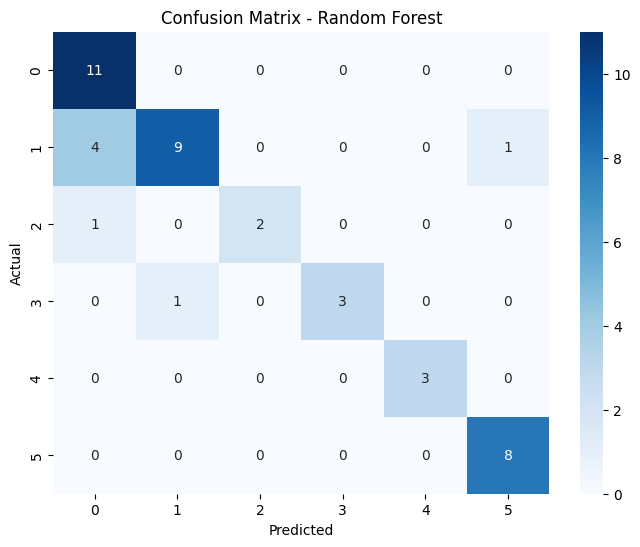

In [17]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [19]:
!pip install --upgrade scikit-learn

In [21]:
# 5. Bagging and Boosting Methods
# Bagging with Random Forest
# The 'base_estimator' argument is used to specify the base model for bagging.
# In this case, we are using a RandomForestClassifier as the base model.
# We have upgraded scikit-learn to ensure compatibility.
bagging_model = BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)
print("\nBagging Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_bagging))
print("Precision:", precision_score(y_test, y_pred_bagging, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_bagging, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_bagging, average='weighted'))



Bagging Model Performance:
Accuracy: 0.8604651162790697
Precision: 0.8816935002981515
Recall: 0.8604651162790697
F1 Score: 0.8553899158550323


In [22]:
# Boosting with AdaBoost
boosting_model = AdaBoostClassifier(n_estimators=50, random_state=42)
boosting_model.fit(X_train, y_train)
y_pred_boosting = boosting_model.predict(X_test)
print("\nBoosting Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_boosting))
print("Precision:", precision_score(y_test, y_pred_boosting, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_boosting, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_boosting, average='weighted'))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Boosting Model Performance:
Accuracy: 0.4883720930232558
Precision: 0.48119015047879615
Recall: 0.4883720930232558
F1 Score: 0.42529203729503806


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
